<a href="https://colab.research.google.com/github/sreya-rc/TF2.0/blob/main/TF2_0_ANN_MISTN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow
try:
  %tensorflow_version 2.x # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [ ]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0   # to scale color values between 0 and 1

print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2965 - accuracy: 0.9144 - val_loss: 0.1369 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1410 - accuracy: 0.9581 - val_loss: 0.0982 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1070 - accuracy: 0.9678 - val_loss: 0.0856 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0898 - accuracy: 0.9723 - val_loss: 0.0788 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0753 - accuracy: 0.9761 - val_loss: 0.0778 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0645 - accuracy: 0.9794 - val_loss: 0.0738 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0578 - accuracy: 0.9810 - val_loss: 0.0674 - val_accur

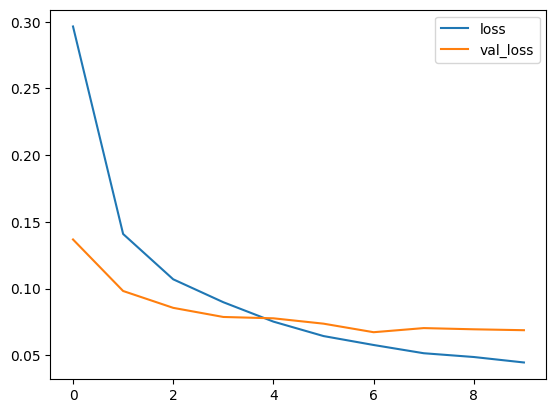

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

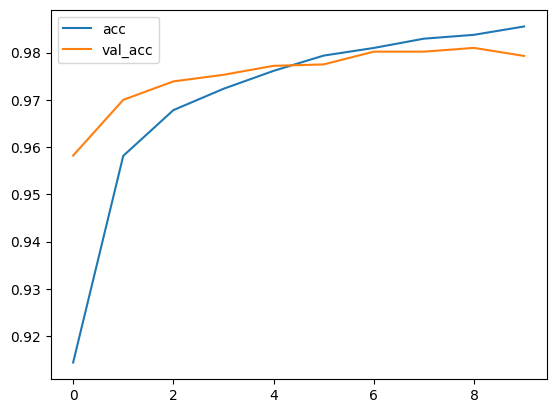

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Evaluate model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0689 - accuracy: 0.9793
[0.06885480880737305, 0.9793000221252441]


313/313 [==============================] - 1s 4ms/step
Confusion matrix, without normalization
[[ 971    0    2    1    0    0    2    1    3    0]
 [   0 1122    4    0    0    0    2    0    7    0]
 [   1    1 1010    2    5    0    2    7    3    1]
 [   0    0    6  996    0    2    0    4    2    0]
 [   0    0    8    1  961    0    0    2    1    9]
 [   3    0    0   10    1  869    1    1    6    1]
 [   6    3    0    1    6    9  929    0    4    0]
 [   2    4    9    2    0    0    0 1006    1    4]
 [   4    0    1    3    6    2    0    4  952    2]
 [   2    2    0    8    8    1    1    9    1  977]]


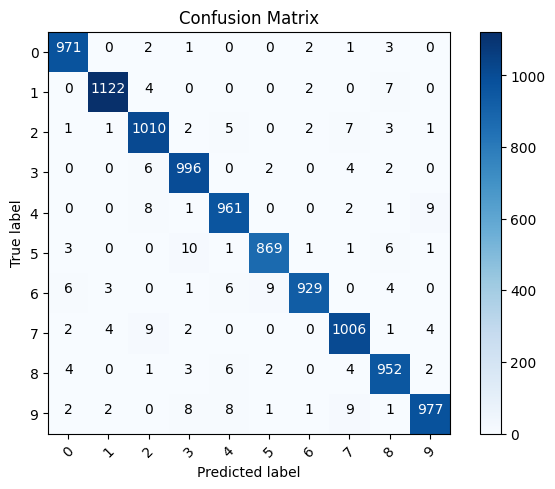

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

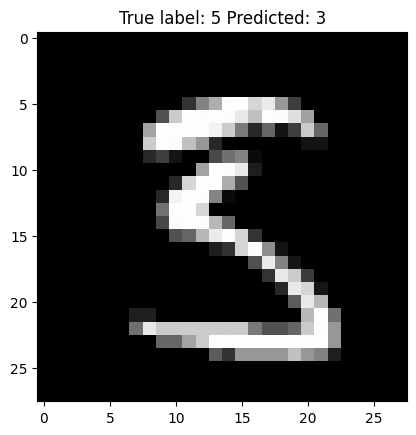

In [ ]:
# Gather indices of all misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));   # Show true label vs. what it was mistaken as